In [1]:
from PIL import Image as PILImage

In [2]:
import numpy as np

In [3]:
# image from https://piq.codeus.net/picture/16586/Nyan-Cat-Icon
file = 'nyancat.png'

In [4]:
pillow_image = PILImage.open(file).convert('RGB')

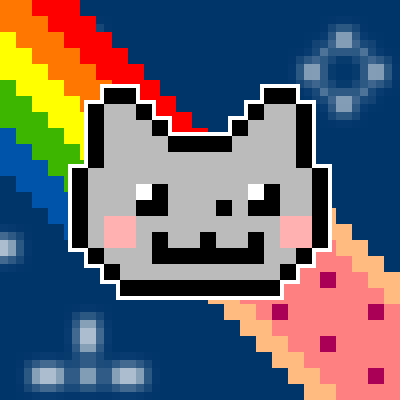

In [5]:
pillow_image

# Reading with different libraries

## Pillow

In [6]:
pillow_array = np.asarray(pillow_image)

In [7]:
pillow_array.shape

(400, 400, 3)

In [8]:
# RGB format
pillow_array[108, 223, :]

array([  0,  53, 106], dtype=uint8)

## OpenCV

In [9]:
import cv2

In [10]:
cv2_array = cv2.imread(file)

In [11]:
# BGR format
cv2_array[108, 223, :]

array([106,  53,   0], dtype=uint8)

## Matplotlib

In [12]:
import matplotlib.pyplot as plt

In [13]:
matplotlib_array = plt.imread(file)

In [14]:
# RGB scaled between 0 and 1
matplotlib_array[108, 223, :]

array([0.        , 0.20784314, 0.41568628], dtype=float32)

To rescale, multiply by 255

In [15]:
255 * matplotlib_array[108, 223, :]

array([  0.,  53., 106.], dtype=float32)

As you can see, all three of them represents the data differently when converted to a numpy array

## Using Wrapper

In [16]:
from PIL import Image
import numpy as np

In [17]:
class MyImage:

    def __init__(self, data):
        self.data = data
        # ... however you want it

    @classmethod
    def read(cls, path):
        with Image.open(path) as image:
            return cls(data=np.asarray(image.convert('RGB')))

In [18]:
nyan_image = MyImage.read(file)

In [19]:
nyan_image.data.shape

(400, 400, 3)

By wrapping, now I have a consistent interface to represent my image data

In [20]:
nyan_image.data[108, 223, :]

array([  0,  53, 106], dtype=uint8)